## Deutsch-Jozsa Algoritması

In [1]:
import cirq
import numpy as np
from matplotlib import pyplot

In [2]:
n = 4
qubits = cirq.LineQubit.range(n + 1)
ancila = qubits[-1]
dj_circuit = cirq.Circuit()

# Ancila kubitini |1> durumuna getir.
dj_circuit.append(cirq.X(ancila))

# Tüm kubitler süperposizyon durumuna getilir.
dj_circuit.append(cirq.H.on_each(*qubits))

print(dj_circuit)

0: ───H───────

1: ───H───────

2: ───H───────

3: ───H───────

4: ───X───H───


In [3]:
def dj_oracle(case, n):
    # Bu devre n+1 kubite sahip: girdi kubit boyutu,
    # ve bir de cikti kubit
    oracle_qc = cirq.Circuit()
    qubits_2 = cirq.LineQubit.range(n+1)

    # Dengeli oracle isteniyor ise:
    if case == "balanced":
        b = np.random.randint(1,2**n)
        # Ikili stringi formatlayalim.
        b_str = format(b, '0'+str(n)+'b')

        # Sonra, ilk X kapilarini koyalim. 
        # Ikili stringteki her rakam bir
        # kubite denk geldigi icin, 
        # string 1 ise X kapisi gerekir.
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.append(cirq.X(qubits_2[qubit]))

        # Cikti qubiti hedef olacak sekilde,
        # tum kubitler ile CNOT uygulanir.
        for qubit in range(n):
            oracle_qc.append(cirq.CX(qubits_2[qubit], qubits_2[n]))

        # Sonra, son X kapilarini koyalim.
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                 oracle_qc.append(cirq.X(qubits_2[qubit]))

    # Sabit oracle isteniyor ise:
    if case == "constant":
    # Ilk olarak hangi sabit cikti 
    # isteniyor rastgele secelim.
        output = np.random.randint(2)
        
        # Rasgele 1 gelirse, son kubite X uygulayalim.
        if output == 1:
            oracle_qc.append(cirq.X(qubits_2[qubit]))

    return oracle_qc

In [4]:
dj_circuit.append(dj_oracle("balanced", n),  range(n + 1))
print(dj_circuit)

              ┌──┐
0: ───H─────────@────────────────
                │
1: ───H────────X┼────@───X───────
                │    │
2: ───H─────────┼────┼───@───────
                │    │   │
3: ───H─────────┼────┼───┼───@───
                │    │   │   │
4: ───X───H─────X────X───X───X───
              └──┘


In [5]:
qubits_to_hm = qubits[:-1]
dj_circuit.append(cirq.H.on_each(qubits_to_hm))
dj_circuit.append(cirq.measure(*qubits_to_hm, key="M"))
print(dj_circuit)

              ┌──┐
0: ───H─────────@────H───────────────M('M')───
                │                    │
1: ───H────────X┼────@───X───H───────M────────
                │    │               │
2: ───H─────────┼────┼───@───H───────M────────
                │    │   │           │
3: ───H─────────┼────┼───┼───@───H───M────────
                │    │   │   │
4: ───X───H─────X────X───X───X────────────────
              └──┘


In [6]:
# Simülasyon başlatılır.
sim = cirq.Simulator()
results = sim.run(dj_circuit, repetitions=1024)

Text(0, 0.5, 'Adet')

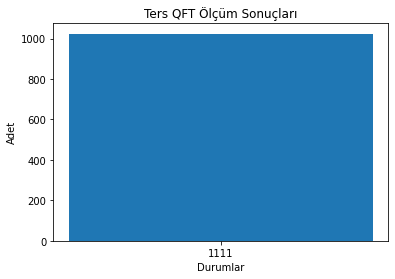

In [7]:
hist = dict()
for val in results.measurements["M"]:
    new_str = ""
    for s in val:
        new_str += str(s)
    try:
        hist[new_str] += 1
    except KeyError:
        hist[new_str] = 1
        
pyplot.bar(hist.keys(), hist.values())
pyplot.title("Ters QFT Ölçüm Sonuçları")
pyplot.xlabel("Durumlar")
pyplot.ylabel("Adet")